# Monte Carlo Simulations for Stock Portfolio by using Geometric Geometric Brownian Motion (GBM)

In [2]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 3.3 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
     |████████████████████████████████| 112 kB 37.8 MB/s 
     |████████████████████████████████| 110 kB 68.3 MB/s 
     |████████████████████████████████| 4.1 MB 61.4 MB/s 
     |████████████████████████████████| 128 kB 43.8 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [15]:
#import talib as ta
import yfinance as yf

import matplotlib.pyplot as plt 
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import pandas as pd




###  Stochastic Differential Equation GBM 

dp/p = mu * dt + sigma * weights

weights follow normal distribution N ~ (0,1)



In [26]:
def MC_simulations(df,n,mu,sigma):
  n_days = df.shape[0] # step size : days
  n_paths = n   # n_paths : no. of simulations

  # initalize for every day
  price = pd.DataFrame(0,index=df.index,columns=list(range(0,n_paths)))
  # for the 1st value - initalize with actual value
  price.iloc[0]=df['Close'].iloc[0] 
  
  # step size : 1 day in yearly scale
  dt = 1/(n_days-1)

  # MC - differential equation
  for i in range(1,n_days):
    weights = np.sqrt(dt)*np.random.randn(n_paths)
    dp_p = mu * dt + sigma * weights  
    price.iloc[i] = price.iloc[i-1] + price.iloc[i-1]*dp_p
    if i%50==0:
      print(f'running for {i}-th day out of {n_days} days')

  return price

In [17]:

def plot_result(df,n,sample_size,price):
  # plot result
  fig = px.line(df['Close'])
  fig.update_traces(line_color='red', line_width=4)

  # randomly select 20 MC simulations
  random_samples = np.random.choice(np.array(range(1,n+1)),size=sample_size)
  for i,_ in enumerate(random_samples):
    fig.add_scatter(x=price.index, y=price[i], mode='lines',line=dict(color='blue',width=2))

  fig.show()

### Lets check Evaluated values against Theoretical Values

Expected value E[p] = p_0 * exp(mu * t) 


Median = p_0 * exp(mu * t - (sig ^ 2) * t/2

In [18]:
def compare_result(df,price,mu,sigma):
  n_days = df.shape[0] # size of data

  # compare mean
  price_eval_mean = price.mean(axis=1)
  price_theo_mean = pd.DataFrame(df['Close'].iloc[0]*np.exp(mu*np.arange(0,n_days)/n_days*2),
                                index=price_eval_mean.index,columns=['Theoretical_Mean'])
  fig = plt.figure(figsize=(15,10))
  plt.plot(price_eval_mean,label='Theoretical mean')
  plt.plot(price_theo_mean,label='Evaluated mean')
  plt.xlabel('Date')
  plt.ylabel('Expected Value')
  plt.title('MC simulation mean comparison')
  plt.legend()
  plt.show()

  # compare median
  price_eval_median = price.median(axis=1)
  price_theo_median = pd.DataFrame(df['Close'].iloc[0]*np.exp(mu - 0.5*sigma*sigma)*np.arange(0,n_days)/n_days*2,
                               index=price_eval_median.index,columns=['Theoretical_Median'])
  fig = plt.figure(figsize=(15,10))
  plt.plot(price_eval_median,label='Theoretical median')
  plt.plot(price_theo_median,label='Evaluated median')
  plt.xlabel('Date')
  plt.ylabel('Expected Value')
  plt.title('MC simulation median comparison')
  plt.legend()
  plt.show()

In [19]:
df = yf.download('RELIANCE.NS',start='2022-01-01',end='2022-12-31',interval = "1D")


fig = go.Figure(data=[go.Candlestick(x=df.index, open=df['Open'], high=df['High'],low=df['Low'], close=df['Close'])])

fig.update_layout(
    title='Candlestick Chart',
    yaxis_title='RELIANCE.NS Stock',
)


fig.show()

[*********************100%***********************]  1 of 1 completed


In [27]:
n = 20000 # n = no. of simulations
sample_size = 20 # no of simulations we want to visualize
sigma = 0.25 # annual volatility : 25%
mu = 0.08 # drift : long term growth assumption 

In [28]:

price = MC_simulations(df,n,mu,sigma) 
plot_result(df,n,sample_size,price)


running for 50-th day out of 248 days
running for 100-th day out of 248 days
running for 150-th day out of 248 days
running for 200-th day out of 248 days


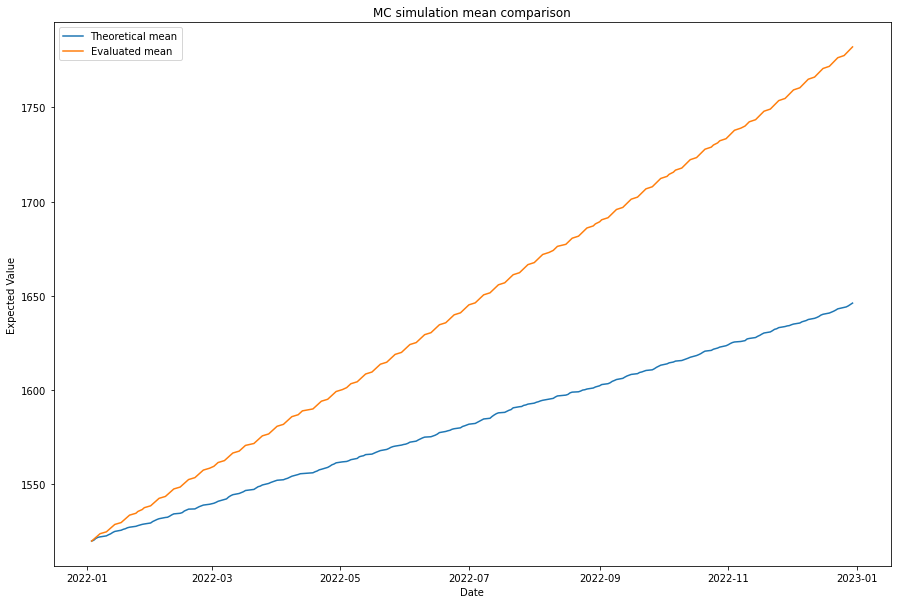

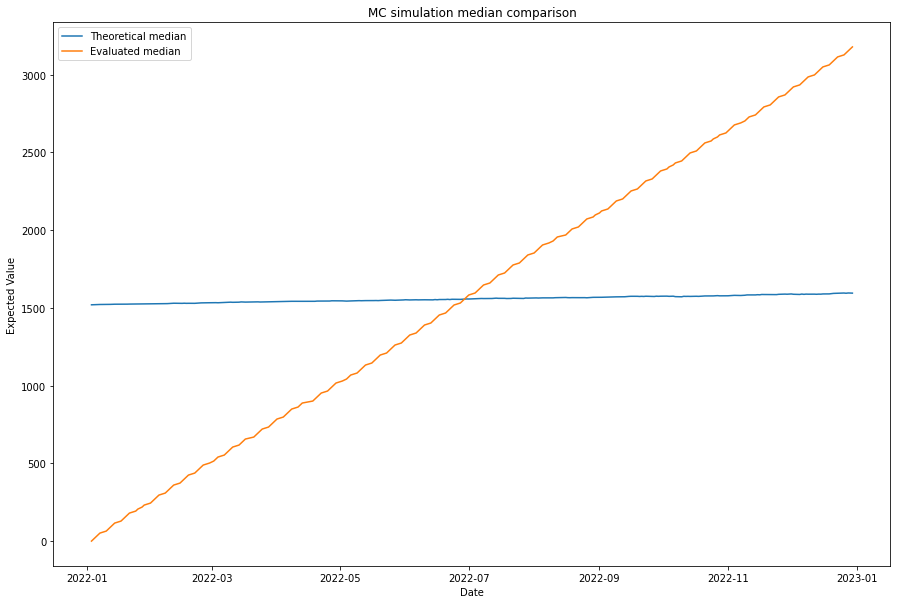

In [29]:
compare_result(df,price,mu,sigma)

In [30]:
df = yf.download('HDFCBANK.NS',start='2022-01-01',end='2022-12-31',interval = "1D")

fig = go.Figure(data=[go.Candlestick(x=df.index, open=df['Open'], high=df['High'],low=df['Low'], close=df['Close'])])

fig.update_layout(
    title='Candlestick Chart',
    yaxis_title='RELIANCE.NS Stock',
)


fig.show()


[*********************100%***********************]  1 of 1 completed


In [32]:
price = MC_simulations(df,n,mu,sigma) 
plot_result(df,n,sample_size,price)

running for 50-th day out of 248 days
running for 100-th day out of 248 days
running for 150-th day out of 248 days
running for 200-th day out of 248 days


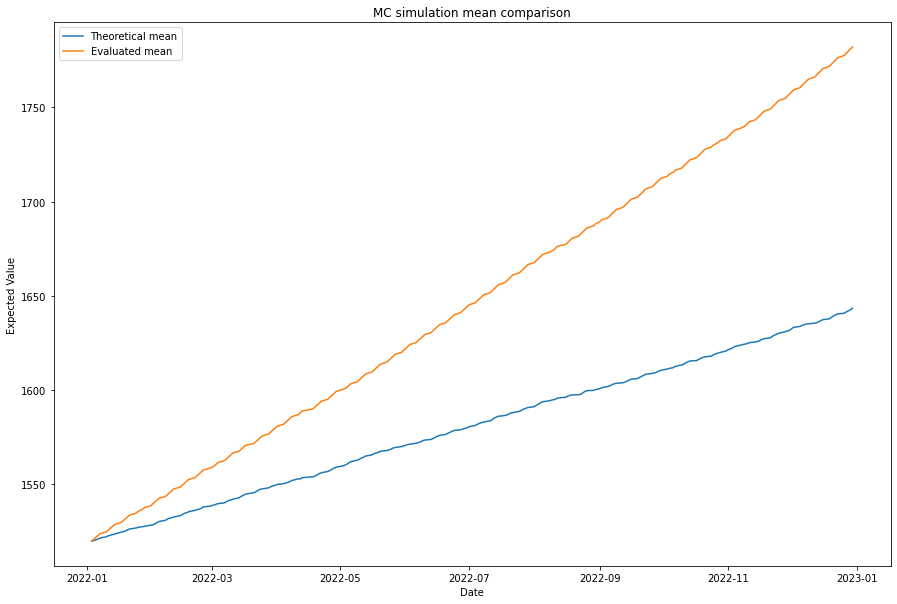

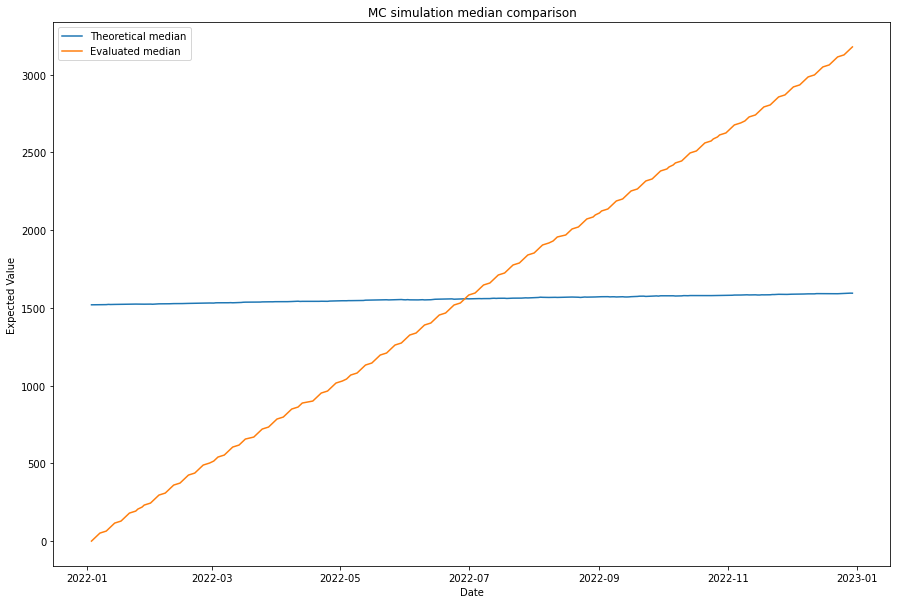

In [33]:
compare_result(df,price,mu,sigma)

In [ ]:
#